In [1]:
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pymysql


In [2]:
wallmart = pd.read_csv('Walmart.csv', sep = ',', dtype={'Store':'category'})

In [67]:
wallmart = wallmart.rename(columns = {
    'Store' : 'Loja',
    'date' : 'Data', 
    'Weekly_Sales' : 'Vendas', 
    'Holiday_Flag' : 'Bandeira feriados', 
    'Temperature' : 'Temperatura', 
    'Fuel_Price' : 'Preço combustível',
    'CPI' : 'IPC', 
    'Unemployment' : 'Desemprego'            
})

In [68]:
wallmart[0:5]

,Loja,Date,Vendas,Bandeira feriados,Temperatura,Preço combustível,IPC,Desemprego,Ano
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010


In [69]:
wallmart.info()
wallmart.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loja               6435 non-null   category
 1   Date               6435 non-null   object  
 2   Vendas             6435 non-null   float64 
 3   Bandeira feriados  6435 non-null   int64   
 4   Temperatura        6435 non-null   float64 
 5   Preço combustível  6435 non-null   float64 
 6   IPC                6435 non-null   float64 
 7   Desemprego         6435 non-null   float64 
 8   Ano                6435 non-null   int64   
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 410.0+ KB


Loja                 0
Date                 0
Vendas               0
Bandeira feriados    0
Temperatura          0
Preço combustível    0
IPC                  0
Desemprego           0
Ano                  0
dtype: int64

In [70]:
corrWM = wallmart.corr()
corrWM

,Vendas,Bandeira feriados,Temperatura,Preço combustível,IPC,Desemprego,Ano
Vendas,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,-0.018378
Bandeira feriados,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,-0.056783
Temperatura,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,0.064269
Preço combustível,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,0.779470
IPC,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,0.074796
Desemprego,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.241813
Ano,-0.018378,-0.056783,0.064269,0.779470,0.074796,-0.241813,1.000000


In [72]:
round(wallmart.drop(['Loja','IPC','Bandeira feriados'], axis = 1).describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Vendas,6435.0,1046964.88,564366.62,209986.25,553350.10,960746.04,1420158.66,3818686.45
Temperatura,6435.0,60.66,18.44,-2.06,47.46,62.67,74.94,100.14
Preço combustível,6435.0,3.36,0.46,2.47,2.93,3.44,3.74,4.47
Desemprego,6435.0,8.00,1.88,3.88,6.89,7.87,8.62,14.31
Ano,6435.0,2010.97,0.80,2010.00,2010.00,2011.00,2012.00,2012.00


<AxesSubplot:>

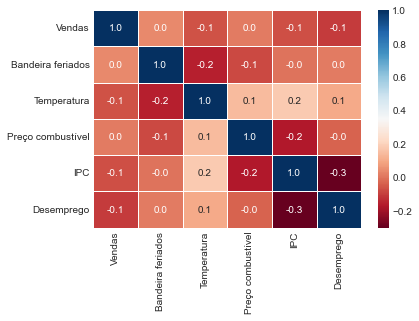

In [55]:
plot = sns.heatmap(corrWM, annot = True, cmap="RdBu", fmt=".1f", linewidths=.6)
plot

In [9]:
wallmart['Loja']\
  .value_counts(ascending=False)
# Todas as lojas apresentam o mesmo númeoro de linhas


1     143
30    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
4     143
40    143
41    143
42    143
43    143
44    143
45    143
5     143
6     143
7     143
8     143
31    143
3     143
10    143
29    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
2     143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
9     143
Name: Loja, dtype: int64

In [10]:
loja = wallmart['Loja'].tolist()
venda_semanal = wallmart['Vendas'].tolist()

In [73]:
# Correlação entre as vendas da semana com o preço do combustível, temperatura e índice de preços
print(np.corrcoef(wallmart['Vendas'], wallmart['Preço combustível'])[0,1], ' Correlação de vendas com o preço do combustível')
print(np.corrcoef(wallmart['Vendas'], wallmart['IPC'])[0,1],' Correlação de vendas com o IPC')
print(np.corrcoef(wallmart['Vendas'], wallmart['Temperatura'])[0,1], ' Correlação de vendas com a temperatura')
print(np.corrcoef(wallmart['Vendas'], wallmart['Desemprego'])[0,1], ' Correlação de vendas com as demições')

0.009463786314475123  Correlação de vendas com o preço do combustível
-0.07263416204017631  Correlação de vendas com o IPC
-0.0638100131794696  Correlação de vendas com a temperatura
-0.10617608965795419  Correlação de vendas com as demições


In [12]:
# As 10 semanas com maior número de vendas
wallmart[['Loja', 'Date', 'Vendas', 'Bandeira feriados', 'Temperatura', 'Preço combustível']].nlargest(10,'Vendas')

,Loja,Date,Vendas,Bandeira feriados,Temperatura,Preço combustível
1905,14,24-12-2010,3818686.45,0,30.59,3.141
2763,20,24-12-2010,3766687.43,0,25.17,3.141
1333,10,24-12-2010,3749057.69,0,57.06,3.236
527,4,23-12-2011,3676388.98,0,35.92,3.103
1762,13,24-12-2010,3595903.20,0,34.90,2.846
1814,13,23-12-2011,3556766.03,0,24.76,3.186
2815,20,23-12-2011,3555371.03,0,40.19,3.389
475,4,24-12-2010,3526713.39,0,43.21,2.887
1385,10,23-12-2011,3487986.89,0,48.36,3.541
189,2,24-12-2010,3436007.68,0,49.97,2.886


In [13]:
# Dataframe das lojas com maiores médias de vendas semananais
wallmart.query("Loja == '9'")
# wallmart.query("Loja == '8'")
# wallmart.query("Loja == '3'")
# wallmart.query("Loja == '11'")
# wallmart.query("Loja == '6'")
# wallmart.query("Loja == '5'")
# wallmart.query("Loja == '1'")
# wallmart.query("Loja == '2'")
# wallmart.query("Loja == '21'")
# wallmart.query("Loja == '30'")

,Loja,Date,Vendas,Bandeira feriados,Temperatura,Preço combustível,IPC,Desemprego
1144,9,05-02-2010,549505.55,0,38.01,2.572,214.655459,6.415
1145,9,12-02-2010,552677.48,1,37.08,2.548,214.805653,6.415
1146,9,19-02-2010,511327.90,0,43.06,2.514,214.850618,6.415
1147,9,26-02-2010,473773.27,0,43.83,2.561,214.878045,6.415
1148,9,05-03-2010,507297.88,0,48.43,2.625,214.905472,6.415
...,...,...,...,...,...,...,...,...
1282,9,28-09-2012,516361.06,0,76.80,3.666,226.763073,5.277
1283,9,05-10-2012,606755.30,0,66.61,3.617,226.966232,4.954
1284,9,12-10-2012,558464.80,0,60.09,3.601,227.169392,4.954
1285,9,19-10-2012,542009.46,0,68.01,3.594,227.214288,4.954


In [14]:
Store = wallmart.groupby(['Loja']).agg({'Vendas':['mean','max','sum']})
Store[:5]
Store.describe()

Vendas                            
               mean           max           sum
count  4.500000e+01  4.500000e+01  4.500000e+01
mean   1.046965e+06  1.817510e+06  1.497160e+08
std    5.466263e+05  1.031133e+06  7.816756e+07
min    2.598617e+05  3.311735e+05  3.716022e+07
25%    5.564039e+05  1.004731e+06  7.956575e+07
50%    9.667816e+05  1.682862e+06  1.382498e+08
75%    1.395901e+06  2.387950e+06  1.996139e+08
max    2.107677e+06  3.818686e+06  3.013978e+08

In [15]:
plt.style.use('seaborn-darkgrid')

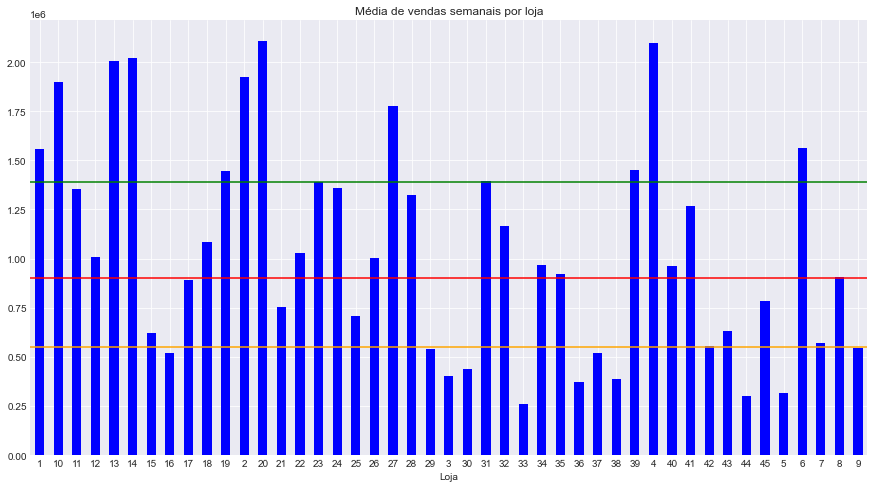

In [16]:
# Médias de vendas de cada loja
plt.figure(figsize = (15,8))
Store[('Vendas',  'mean')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 1)
plt.title('Média de vendas semanais por loja')
plt.axhline(y=550000,color = 'orange')
plt.axhline(y=900000,color = 'red')
plt.axhline(y=1390000,color = 'green')
plt.show()

In [17]:
Feriado = wallmart.groupby(['Loja','Bandeira feriados']).agg({'Vendas':['mean','max','sum']})
Feriado = Feriado.reset_index()
Feriado.describe()

Bandeira feriados        Vendas                            
                                 mean           max           sum
count         90.000000  9.000000e+01  9.000000e+01  9.000000e+01
mean           0.500000  1.082072e+06  1.662790e+06  7.485799e+07
std            0.502801  5.650055e+05  9.318202e+05  8.182109e+07
min            0.000000  2.596562e+05  2.948828e+05  2.625945e+06
25%            0.000000  5.730083e+05  9.162625e+05  1.072622e+07
50%            0.500000  1.003663e+06  1.611063e+06  2.851231e+07
75%            1.000000  1.471959e+06  2.266520e+06  1.278200e+08
max            1.000000  2.249035e+06  3.818686e+06  2.789074e+08

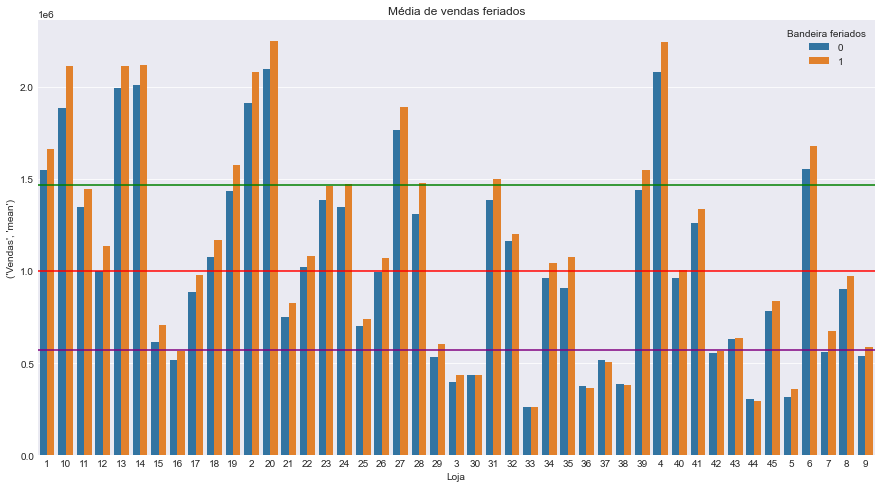

In [18]:
# Venda média das lojas por semana com e sem feriado
plt.figure(figsize=(15,8))
sns.barplot(x = 'Loja',y = ('Vendas',  'mean'),hue= 'Bandeira feriados',data=Feriado)
plt.title('Média de vendas feriados')
plt.axhline(y=570000,color = 'purple')
plt.axhline(y=1000000,color = 'red')
plt.axhline(y=1470000,color = 'green')
plt.show()

In [33]:
# As médias de venda de cada ano
# Se observa que a média semanal de vendas foi diminuindo de 2010 para 2012
wallmart['Ano'] = pd.DatetimeIndex(wallmart['Date']).year 
ano_media = wallmart[wallmart.columns[2:9]].groupby('Ano').mean()
ano_media

,Vendas,Bandeira feriados,Temperatura,Preço combustível,IPC,Desemprego
Ano,,,,,,
2010,1.059670e+06,0.083333,60.266958,2.823767,168.101782,8.492714
2011,1.046239e+06,0.076923,58.798530,3.561915,171.545716,8.082036
2012,1.033660e+06,0.046512,63.362403,3.709776,175.498781,7.347964


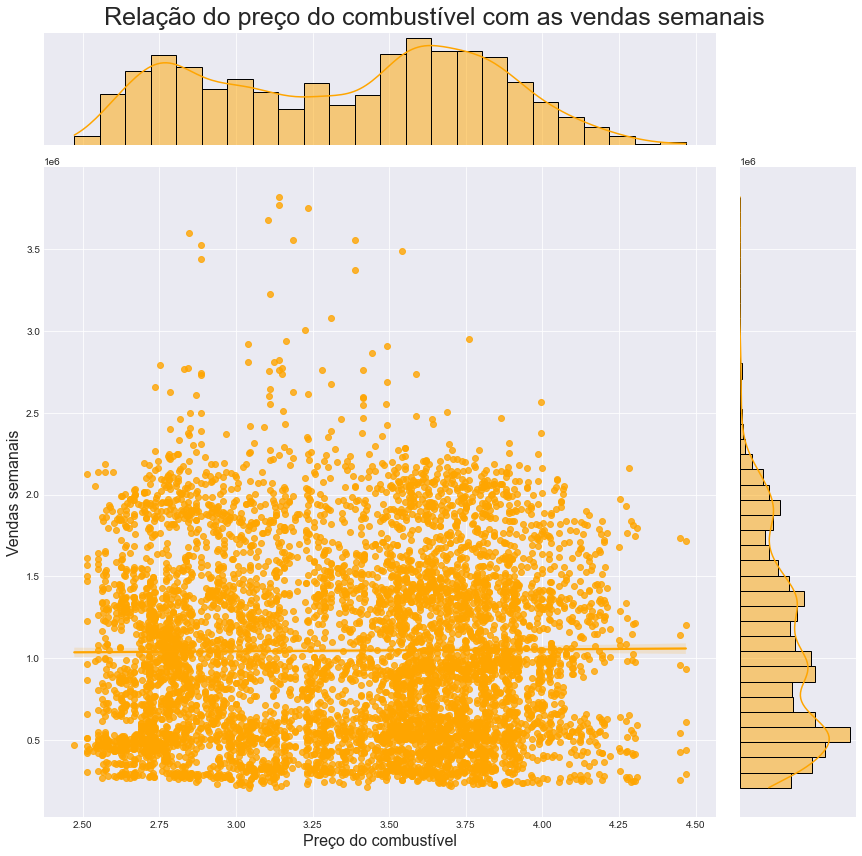

In [41]:
ax = sns.jointplot(x='Preço combustível',y='Vendas',data=wallmart, kind='reg',
                  height = 12, color='orange')
ax.fig.suptitle('Relação do preço do combustível com as vendas semanais',size = 25)
ax.fig.subplots_adjust(top=0.95)
ax.set_axis_labels('Preço do combustível', 'Vendas semanais', fontsize=16)
plt.show()

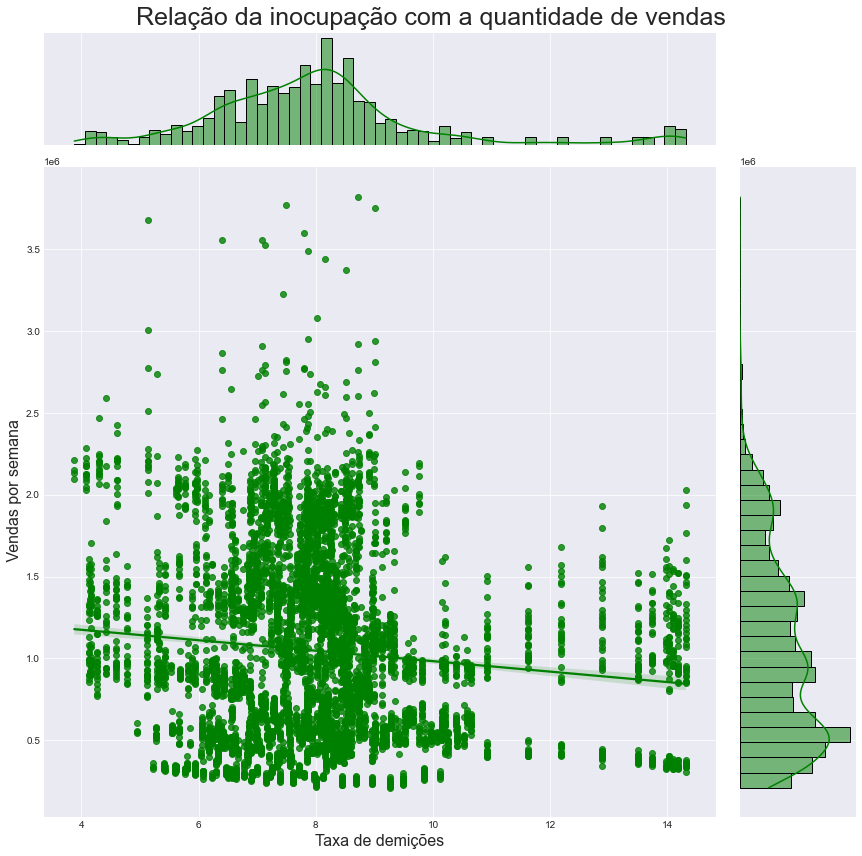

In [44]:
ax1 = sns.jointplot(x='Desemprego',y='Vendas',data=wallmart, kind='reg',
                  height = 12, color = 'green')
ax1.fig.suptitle('Relação da inocupação com a quantidade de vendas ',size = 25)
ax1.fig.subplots_adjust(top=0.95)
ax1.set_axis_labels('Taxa de demições', ' Vendas por semana', fontsize=16)
plt.show()

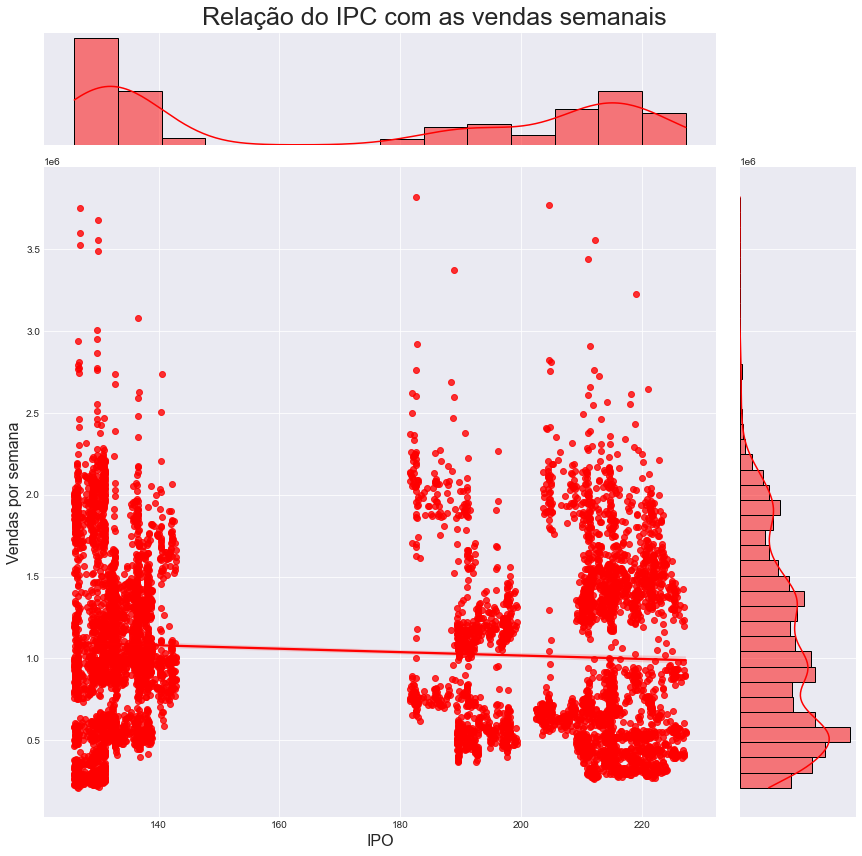

In [49]:
ax2 = sns.jointplot(x='IPC',y='Vendas',data=wallmart, kind='reg',
                  height = 12, color='red')
ax2.fig.suptitle('Relação do IPC com as vendas semanais',size = 25)
ax2.fig.subplots_adjust(top=0.95)
ax2.set_axis_labels('IPC', 'Vendas por semana', fontsize=16)
plt.show()